<a href="https://colab.research.google.com/github/sethnanati/FoodHub-Data-Analysis/blob/main/FDS_Project_LearnerNotebook_FullCode.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project Foundations for Data Science: FoodHub Data Analysis

**Marks: 40**

### Context

The number of restaurants in New York is increasing day by day. Lots of students and busy professionals rely on those restaurants due to their hectic lifestyles. Online food delivery service is a great option for them. It provides them with good food from their favorite restaurants. A food aggregator company FoodHub offers access to multiple restaurants through a single smartphone app.

The app allows the restaurants to receive a direct online order from a customer. The app assigns a delivery person from the company to pick up the order after it is confirmed by the restaurant. The delivery person then uses the map to reach the restaurant and waits for the food package. Once the food package is handed over to the delivery person, he/she confirms the pick-up in the app and travels to the customer's location to deliver the food. The delivery person confirms the drop-off in the app after delivering the food package to the customer. The customer can rate the order in the app. The food aggregator earns money by collecting a fixed margin of the delivery order from the restaurants.

### Objective

The food aggregator company has stored the data of the different orders made by the registered customers in their online portal. They want to analyze the data to get a fair idea about the demand of different restaurants which will help them in enhancing their customer experience. Suppose you are hired as a Data Scientist in this company and the Data Science team has shared some of the key questions that need to be answered. Perform the data analysis to find answers to these questions that will help the company to improve the business.

### Data Description

The data contains the different data related to a food order. The detailed data dictionary is given below.

### Data Dictionary

* order_id: Unique ID of the order
* customer_id: ID of the customer who ordered the food
* restaurant_name: Name of the restaurant
* cuisine_type: Cuisine ordered by the customer
* cost: Cost of the order
* day_of_the_week: Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)
* rating: Rating given by the customer out of 5
* food_preparation_time: Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.
* delivery_time: Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information

### Let us start by importing the required libraries

In [ ]:
# import libraries for data manipulation
import numpy as np
import pandas as pd

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

### Understanding the structure of the data

In [ ]:
# uncomment and run the following lines for Google Colab
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# read the data
df = pd.read_csv("/content/drive/MyDrive/Colab_Notebooks/FoodHub/foodhub_order.csv")
# returns the first 5 rows
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


#### Observations:

A glance at the imported data reveals that there are 9 columns in the dataset. These includes the Customer id, the names of the restaurant, order id, types of cuisines, cost of the food ordered, the day of the week, customer rating feedback, time taken to prepare the meal and delivery time.

### **Question 1:** How many rows and columns are present in the data?

In [ ]:
# Write your code here
df.shape

(1898, 9)

#### Observations:
 Using the Pandas package to read the .csv file and further using the shape function in Pandas, the data consist of **1898** **Rows** and **9** **Columns**


### **Question 2:** What are the datatypes of the different columns in the dataset? (The info() function can be used)

In [ ]:
# Use info() to print a concise summary of the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


#### Observations:

Using the pandas(df.info()) function. The data structure has -

*   1 float64
*   4 int64
*   4 object


### **Question 3:** Are there any missing values in the data? If yes, treat them using an appropriate method

In [ ]:
# Write your code here
df.describe

<bound method NDFrame.describe of       order_id  customer_id                        restaurant_name  \
0      1477147       337525                                Hangawi   
1      1477685       358141              Blue Ribbon Sushi Izakaya   
2      1477070        66393                            Cafe Habana   
3      1477334       106968              Blue Ribbon Fried Chicken   
4      1478249        76942                       Dirty Bird to Go   
...        ...          ...                                    ...   
1893   1476701       292602  Chipotle Mexican Grill $1.99 Delivery   
1894   1477421       397537                              The Smile   
1895   1477819        35309                      Blue Ribbon Sushi   
1896   1477513        64151                      Jack's Wife Freda   
1897   1478056       120353                      Blue Ribbon Sushi   

       cuisine_type  cost_of_the_order day_of_the_week     rating  \
0            Korean              30.75         Weekend  

#### Observations:
Using the df.describe function of pandas, all the column and rows have data, but the rating column contain "Not given" where in customers did not provide a rating.

In [ ]:
#Replacing the"Not given in the rating column with zero and conversion of rating to numeric
df['rating'] = df['rating'].replace(
    to_replace=['Not given'],
    value=0).apply(pd.to_numeric)

#Converting the datatype for order_id and customer_id from int64 to object, that is non numeric data form
df = df.astype({"order_id": object, "customer_id": object})

In [ ]:
df.describe

<bound method NDFrame.describe of      order_id customer_id                        restaurant_name  \
0     1477147      337525                                Hangawi   
1     1477685      358141              Blue Ribbon Sushi Izakaya   
2     1477070       66393                            Cafe Habana   
3     1477334      106968              Blue Ribbon Fried Chicken   
4     1478249       76942                       Dirty Bird to Go   
...       ...         ...                                    ...   
1893  1476701      292602  Chipotle Mexican Grill $1.99 Delivery   
1894  1477421      397537                              The Smile   
1895  1477819       35309                      Blue Ribbon Sushi   
1896  1477513       64151                      Jack's Wife Freda   
1897  1478056      120353                      Blue Ribbon Sushi   

       cuisine_type  cost_of_the_order day_of_the_week  rating  \
0            Korean              30.75         Weekend       0   
1          Japane

#### Observations:
Using the df.astypes and apply function the not given in ranking has been assigned a numeric value of 0 for uniformity of the dataset.  We there are still no null value in the dataset after correction.


### **Question 4:** Check the statistical summary of the data. What is the minimum, average, and maximum time it takes for food to be prepared once an order is placed?

In [ ]:
# Write your code here
df[['cost_of_the_order','rating','food_preparation_time','delivery_time']].describe()

,cost_of_the_order,rating,food_preparation_time,delivery_time
count,1898.000000,1898.000000,1898.000000,1898.000000
mean,16.498851,2.659642,27.371970,24.161749
std,7.483812,2.195280,4.632481,4.972637
min,4.470000,0.000000,20.000000,15.000000
25%,12.080000,0.000000,23.000000,20.000000
50%,14.140000,4.000000,27.000000,25.000000
75%,22.297500,5.000000,31.000000,28.000000
max,35.410000,5.000000,35.000000,33.000000


#### Observations:
The statistical summary provided containsin the following breakdown -

*   Total sample count - 1898
*   Cost of a meal minimum of 4.47, maximum of 35.41, while 25% cost 12.08 and 75% cost 22.29 with a mean of 16.49, standard deviation of 7.48
*   Rating minimum of 0.0 or no rating, maximum of 5.0. 25& of the customer did not provide any rating and 75% provided rating. With a mean of 2.65 and standard deviation of 2.19
*   Food preparation time minimum of 20 minutes, maximum of 35 minutes, while it takes 23minutes to prepare the food at 25% of the time it takes 31 minutes at about 75% of the time. with a mean of 27.37 and a standard deviation of 4.63
*   Delivery time minimum of 15 minutes and maximum of 35 minutes. with a mean of 24.161 and a standard deviation of 4.97


### **Question 5:** How many orders are not rated?

In [ ]:
# Write the code here
#Using pandas groupby() and sum() function
# Use GroupBy() to compute the sum
df1=df['rating'].explode().value_counts().to_dict()

df2 = df.groupby('rating')['rating'].count()
print(df2)

print('count of rating with 0 = ', df1[0], f"(This order had not given in the rating but was replaced by zero) {df1[0]} orders not rated)")
print('count of rating with 3 = ', df1[3])
print('count of rating with 4 = ', df1[4])
print('count of rating with 5 = ', df1[5])


rating
0    736
3    188
4    386
5    588
Name: rating, dtype: int64
count of rating with 0 =  736 (This order had not given in the rating but was replaced by zero) 736 orders not rated)
count of rating with 3 =  188
count of rating with 4 =  386
count of rating with 5 =  588


#### Observations:
736 orders not rated



*   count of rating with 0 =  736 (This order had not given in the rating but was replaced by zero),*italicised text*

### Exploratory Data Analysis (EDA)

### Univariate Analysis

### **Question 6:** Explore all the variables and provide observations on their distributions. (Generally, histograms, boxplots, countplots, etc. are used for univariate exploration)

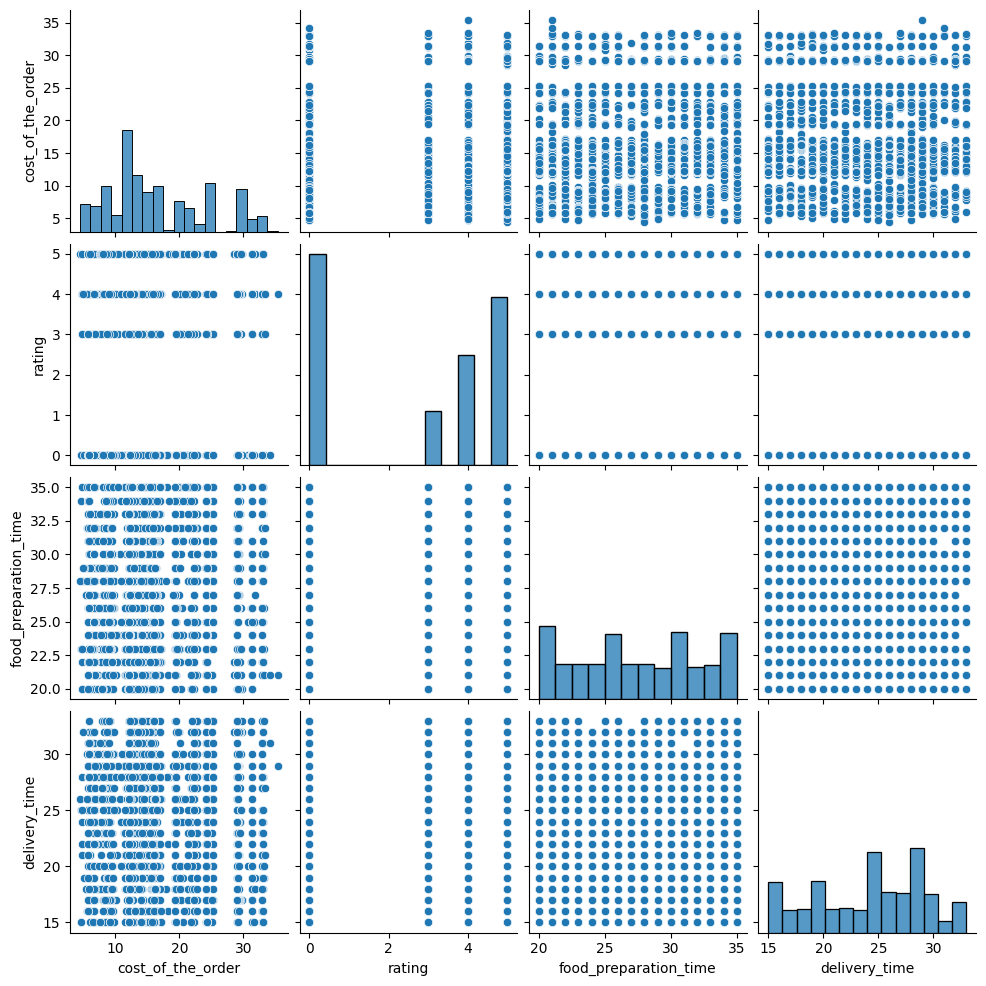

In [ ]:
sns.pairplot(data=df[['cost_of_the_order','rating','food_preparation_time','delivery_time']])

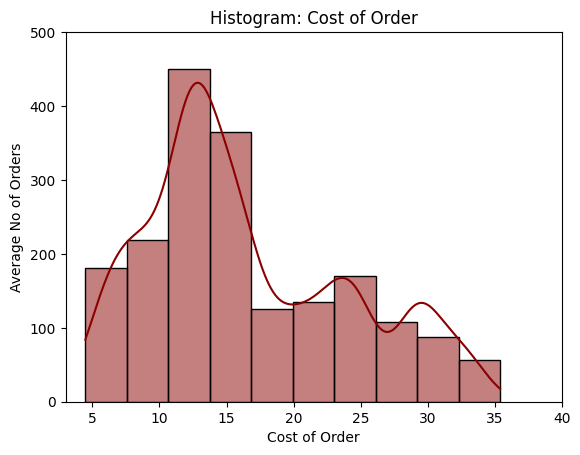

In [ ]:
# Write the code here
plt.title('Histogram: Cost of Order')
plt.xlim(3,40)
plt.ylim(0,500)
plt.xlabel('Cost of Order')
plt.ylabel('Average No of Orders')
sns.histplot(data=df, x='cost_of_the_order', kde=True, bins= 10, color='darkred')
plt.show();


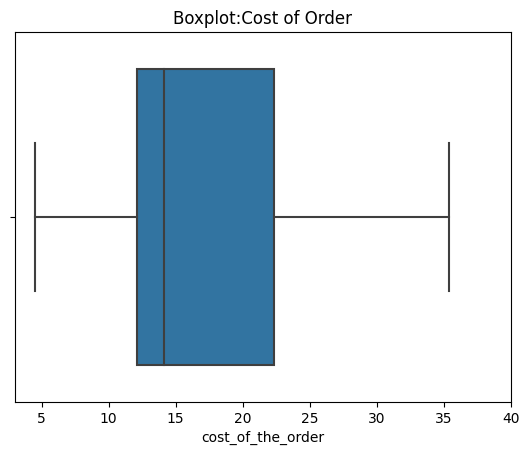

In [ ]:
plt.title('Boxplot:Cost of Order')
plt.xlim(3,40)
plt.xlabel('Cost of Ordering')
sns.axes_style('whitegrid')
sns.boxplot(data=df, x='cost_of_the_order');

#sns.boxplot(data=df, x='cost_of_the_order',color='darkblue');
plt.show();


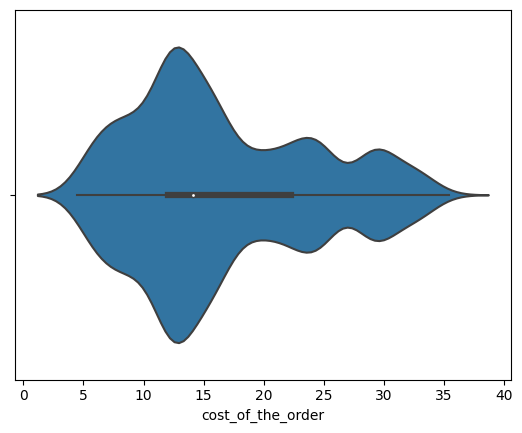

In [ ]:
sns.violinplot(data=df, x='cost_of_the_order');

#### Observations:
Cost of order from the histogram plot shows that more orders were made within the $14 range meal and the quite lower for the $35 meal.
The box plot also indicate that median cost is at $14 and we also make some more sales above the median for the meal that fall with the > $20 range sometimes. We can also see the same representation in the violin plot which is consistent with the histogram and the box plot

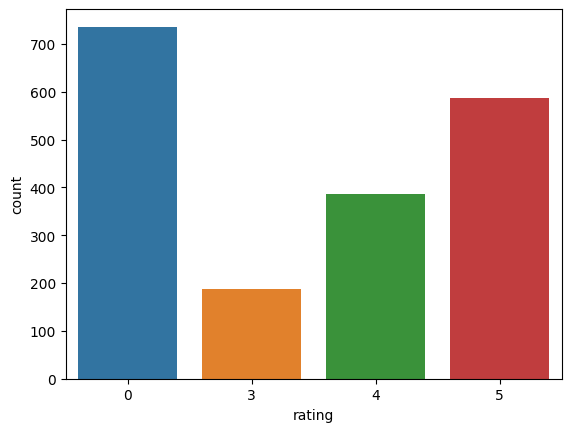

In [ ]:
sns.countplot(data=df, x='rating');

#### Observations:
Our observation of the rating from the countplot shows that we are getting fewer ratings from the customers.
The customer who did not rate our meal and delivery are greater than those that rated.

In [ ]:
df[['cost_of_the_order','cuisine_type']].groupby('cuisine_type').count().sort_values(by='cost_of_the_order', axis=0, ascending=False).head(5).to_dict()

{'cost_of_the_order': {'American': 584,
  'Japanese': 470,
  'Italian': 298,
  'Chinese': 215,
  'Mexican': 77}}

<Axes: xlabel='rating', ylabel='count'>

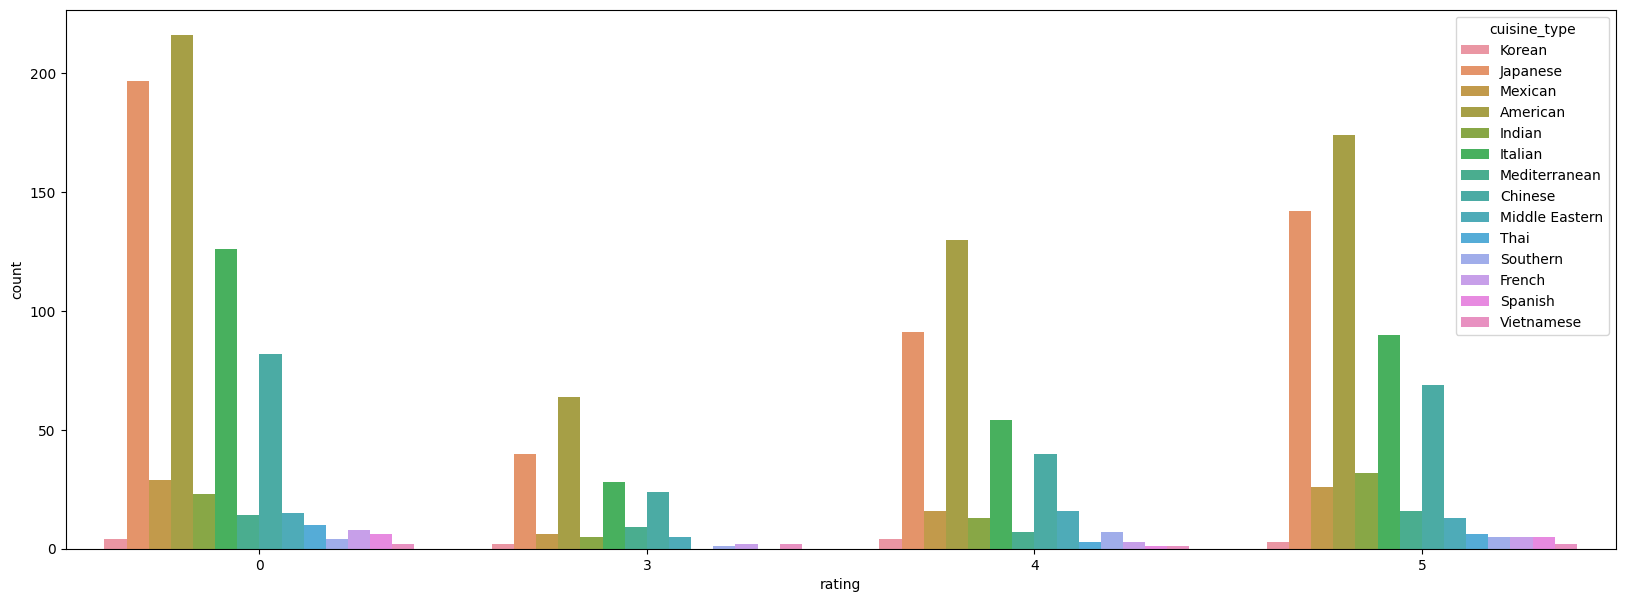

In [ ]:
df[['cuisine_type','rating']].groupby('cuisine_type').count().sort_values(by='rating', axis=0, ascending=False).head(5)
plt.figure(figsize=(20,7))
sns.countplot(data=df, x='rating', hue= 'cuisine_type' )

#### Observations:
Insight from this countplot also indicate that more customer like our American cuisine, more than all our cuisines but they also prefer the Japna cuisine next, then the Italian cuisine, and the Chinese cuisine.

Text(0, 0.5, 'Rating')

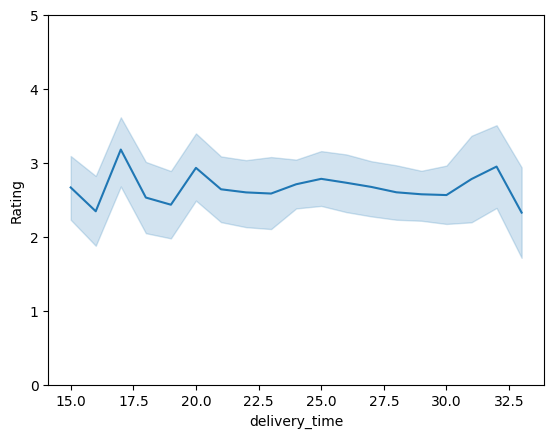

In [ ]:
#plt.figure(figsize = (15,7))
plt.ylim(0,5)
sns.lineplot(data =df , x = 'delivery_time', y='rating')
plt.ylabel('Rating')

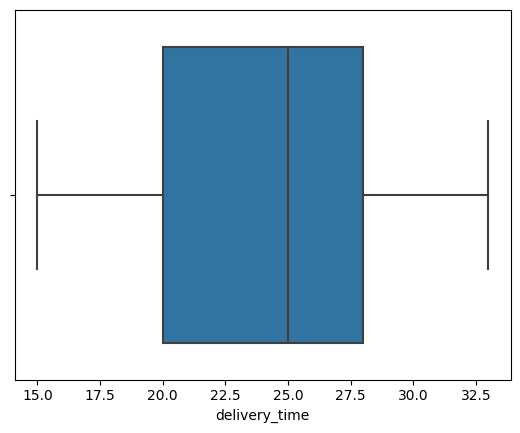

In [ ]:
sns.boxplot(data=df, x='delivery_time')
plt.show()

#### Observations:
The line plot of our delivery time and ranking is we have an average ranking which higher raking from deliveries within the 18th mins while our median delivery time from the boxplot shows range of 25 - 27.5 minutes.

### **Question 7**: Which are the top 5 restaurants in terms of the number of orders received?

In [ ]:
# Write the code here
#From the dataset get the weekend day of the week
#do a count of the restuarant and orderid and then count and groupby the restuarant name df[['restaurant_name','order_id']].groupby('restaurant_name').count()
#Sort the data using the orderif .sort_values(by='order_id', axis=0, ascending=False).head(5)

df[['restaurant_name','order_id']].groupby('restaurant_name').count().sort_values(by='order_id', axis=0, ascending=False).head(5)


,order_id
restaurant_name,
Shake Shack,219
The Meatball Shop,132
Blue Ribbon Sushi,119
Blue Ribbon Fried Chicken,96
Parm,68


#### Observations:

219 orders were received by Shake Shack which is the highest of all the restaurants followed by the Meatball Shop at 132, Blue Ribbon Sushi at 119, Blue Ribbon Fried Chicken at 86, and Parm at number 5 with 68 orders.

### **Question 8**: Which is the most popular cuisine on weekends?

In [ ]:
# Write the code here
#From the dataset get the weekend day of the week
#do a count with groupby the cuisine type df[df['day_of_the_week']=='Weekend'].groupby('cuisine_type').count(). and order the result by order_id sort_values(by='order_id', axis=0, ascending=False
#retunr on the first five records with .head(5)
df[df['day_of_the_week']=='Weekend'].groupby('cuisine_type').count().sort_values(by='order_id', axis=0, ascending=False).head(5)

,order_id,customer_id,restaurant_name,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
cuisine_type,,,,,,,,
American,415,415,415,415,415,415,415,415
Japanese,335,335,335,335,335,335,335,335
Italian,207,207,207,207,207,207,207,207
Chinese,163,163,163,163,163,163,163,163
Mexican,53,53,53,53,53,53,53,53


#### Observations:
The most popular cuisine on weekends is the American cuisine which has 415 count of order on the weekend.

### **Question 9**: What percentage of the orders cost more than 20 dollars?

In [ ]:
# Write the code here
#define the dollar variable and the column of the dataset
dollars = 20
column_name = 'cost_of_the_order'

# Set the data into the dataframe
column = df[column_name]
# Get count of values greater than 20 in the column
percent_of_order_cost = column[column > dollars].count()/df['cost_of_the_order'].count() * 100
print(round(percent_of_order_cost,2))

29.24


#### Observations:
The data shows that 28.24% of the cost of all the orders are $20 and above.


### **Question 10**: What is the mean order delivery time?

In [ ]:
# Write the code here
#Using the pandas mean() function or using the describe() function)
round(df['delivery_time'].mean(), 2)

24.16

#### Observations:
The mean order delivery time is about 24.16 minutes.


### **Question 11:** The company has decided to give 20% discount vouchers to the top 3 most frequent customers. Find the IDs of these customers and the number of orders they placed

In [ ]:
# Write the code here
#using the dataset, do a count fo the orderid and cunstomerid and group by the customerid
#sort the result by the orderid and return only the top 3 customer id
top = 3
df[['order_id','customer_id']].groupby('customer_id').count().sort_values(by='order_id', axis=0, ascending=False).head(top)

,order_id
customer_id,
52832,13
47440,10
83287,9


#### Observations:
The customers that are eligible for the 20% discounts are customer id based on the frequencies of there purchase

*   The customer id 52832 made 13 purcahses from the data sample, making this customer the most frequent
*   The customer id 47440 made 10 purchses making him the second most frequent
*  While the last customer id 83287 made 9 purchases making him also eligible for the 20% discount.*italicised text*




### Multivariate Analysis

### **Question 12**: Perform a multivariate analysis to explore relationships between the important variables in the dataset. (It is a good idea to explore relations between numerical variables as well as relations between numerical and categorical variables)

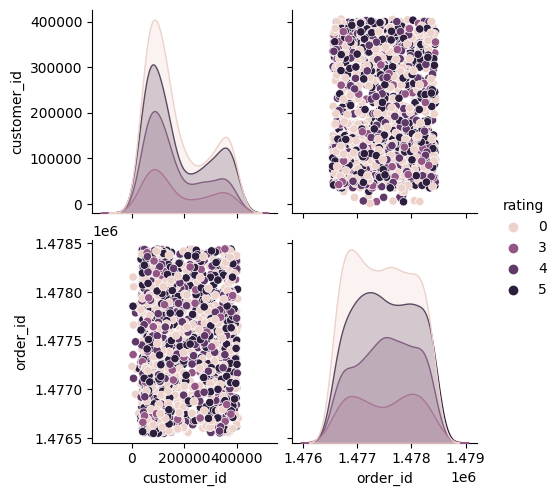

In [ ]:
sns.pairplot(data=df, vars=['customer_id','order_id'], hue='rating');

<ipython-input-205-1f77a0dece0e>:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  'food_preparation_time','delivery_time']].corr(),annot=True, cmap='YlGnBu');


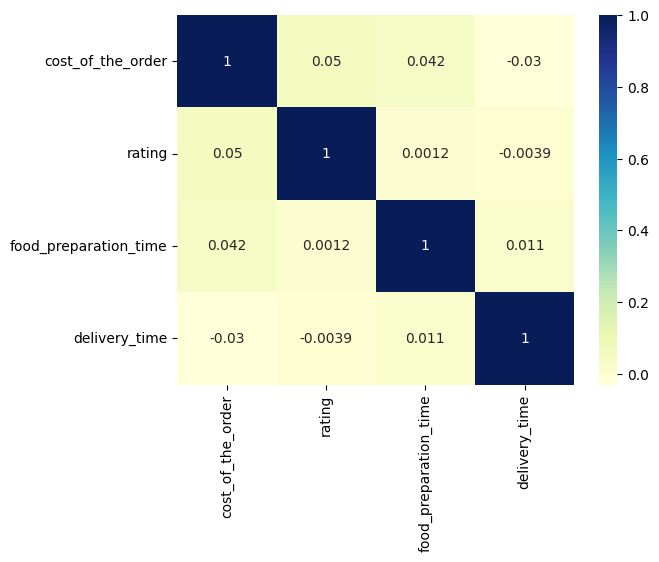

In [ ]:
sns.heatmap(data=df[['order_id','customer_id','restaurant_name','cost_of_the_order','day_of_the_week','rating',
                            'food_preparation_time','delivery_time']].corr(),annot=True, cmap='YlGnBu');

#### Observations:
The heatmap correlation are marginal, and it doesn't portray much significance

<Axes: xlabel='rating', ylabel='count'>

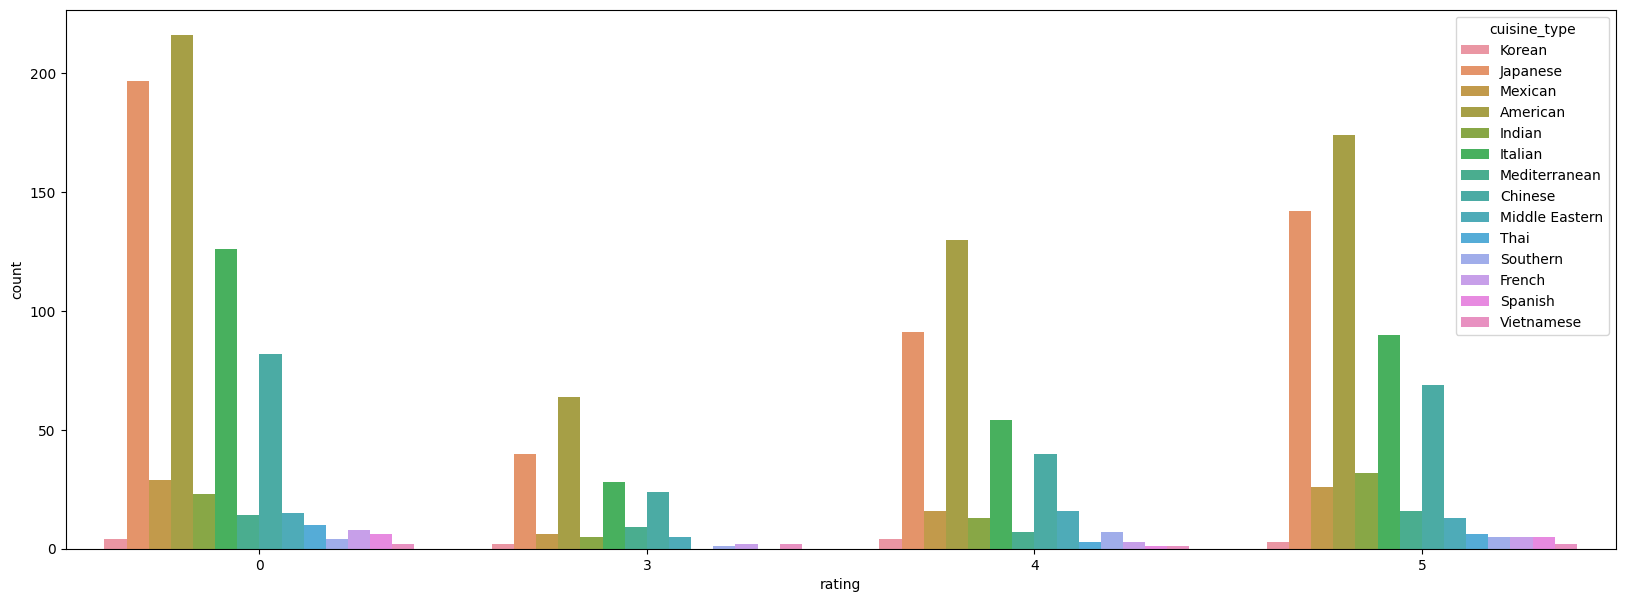

In [ ]:
df[['cuisine_type','rating']].groupby('cuisine_type').count().sort_values(by='rating', axis=0, ascending=False).head(5)
plt.figure(figsize=(20,7))
sns.countplot(data=df, x='rating', hue= 'cuisine_type' )

#### Observations:

The countplot above indicates that the generally the cuisine which is perferred American, Japan, Italian and Chinese cuisine also further down to the next plot

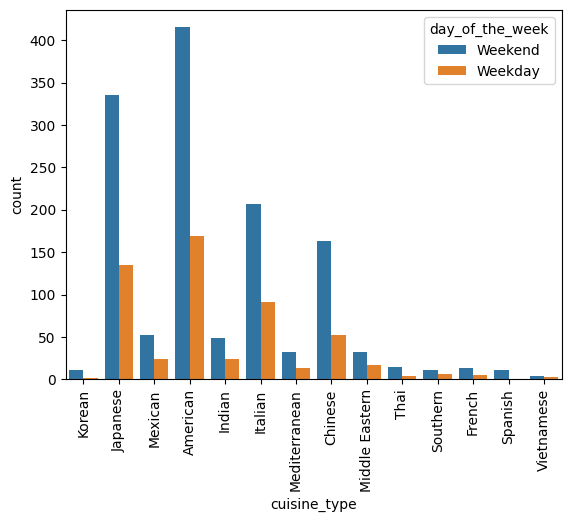

In [ ]:
sns.countplot(data=df, x='cuisine_type', hue = 'day_of_the_week')
plt.xticks(rotation =90)
plt.show()

#### Observations:

This count plot also reinforce that the cuisine that is preferred generally are also the same cuisine preferred on weekends.

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.10/dist-packages/matplotlib/pyplot.py'>

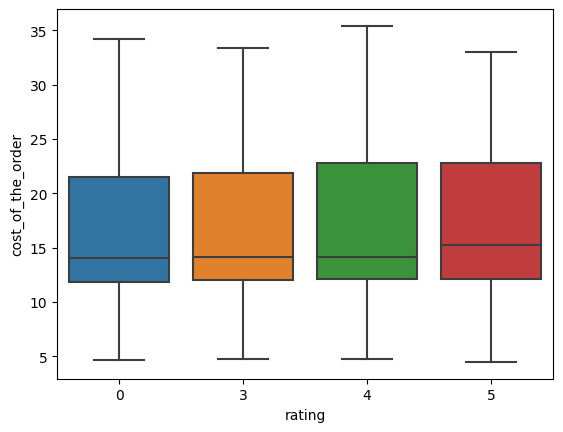

In [ ]:
sns.boxplot(data=df, x='rating', y='cost_of_the_order')

<Axes: xlabel='day_of_the_week', ylabel='cost_of_the_order'>

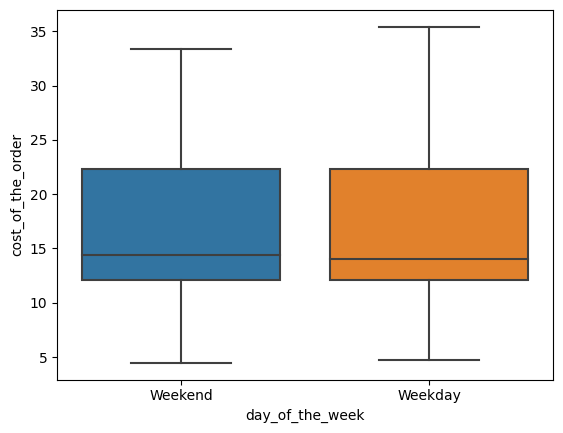

In [ ]:
# Write the code here
#order_id,	customer_id,	restaurant_name,	cost_of_the_order,	day_of_the_week,	rating,	food_preparation_time,	delivery_time
sns.boxplot(data=df, x='day_of_the_week', y='cost_of_the_order')

<Axes: xlabel='cost_of_the_order', ylabel='cuisine_type'>

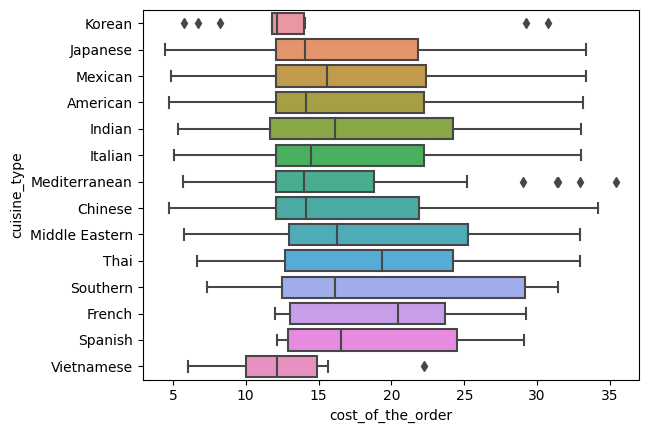

In [ ]:
sns.boxplot(data=df, x='cost_of_the_order',y='cuisine_type')

#### Observations:

The buying pattern of the customers remains the same on weekdays and on weekends. however there are some outliers noticed in the Korean, Mediterranean and Vietnamese cuisine from the boxplot provided

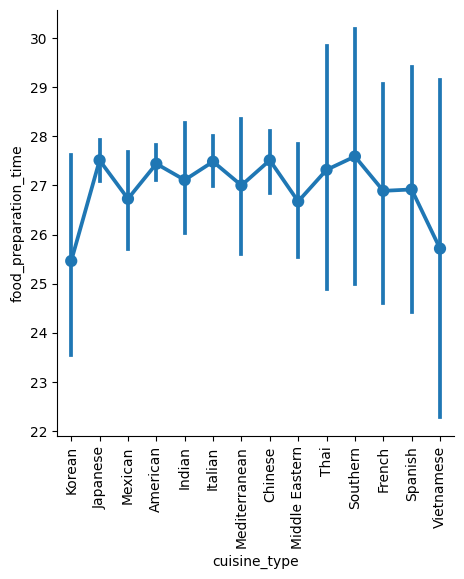

In [ ]:
sns.catplot(data = df, x = 'cuisine_type',y = 'food_preparation_time',kind = 'point')
plt.xticks(rotation=90)
plt.show()

#### Observations:

There are no significant difference in the cuisine preparation time as they are almost the same

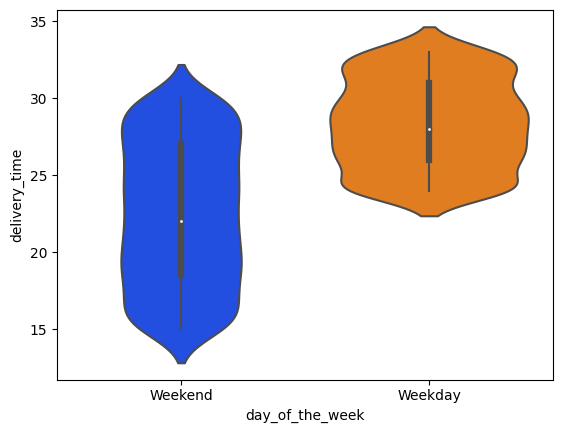

In [ ]:
sns.violinplot(data=df, x='day_of_the_week', y='delivery_time', palette="bright");

#### Observations:

The delivery time on the weekday tend to take longer than the weekend this could also be attribute to more demands on the weekday than the weekends which has a minimum of below 15 minutes compared to the weekday of 22minutes

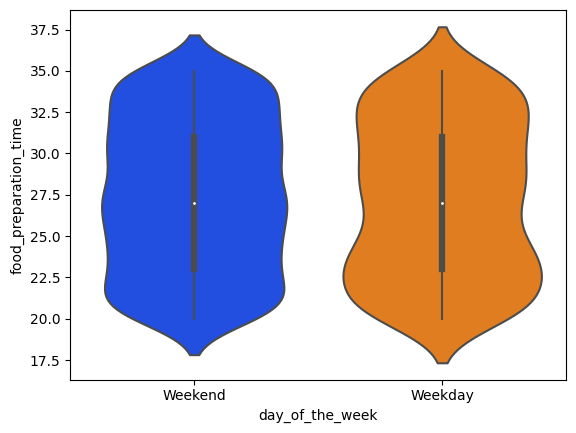

In [ ]:
sns.violinplot(data=df, x='day_of_the_week', y='food_preparation_time', palette="bright");

#### Observations:

The food preparation time is the same across the week. It hast the same balance on weekdays and weekends.

### **Question 13:** The company wants to provide a promotional offer in the advertisement of the restaurants. The condition to get the offer is that the restaurants must have a rating count of more than 50 and the average rating should be greater than 4. Find the restaurants fulfilling the criteria to get the promotional offer

In [ ]:
# Write the code here
#Get the mean rating of the restaurant about mean rating of 4 using groupby and greater than 4
dff1 = df[['restaurant_name','rating']][df['rating']!= 0].groupby('restaurant_name').mean()> 4
#Get the rating count of the restaurant that are more than 50 using groupby and greater than 50
dff2 = df[['restaurant_name','rating']][df['rating']!= 0].groupby('restaurant_name').count()> 50

#Greate a data set to merge bot the mean rating of greater than 4 and rating count of more than 50 to form a sub dataset
resturant_meeting_criteria = pd.merge(dff2[dff2['rating']== True], dff1[dff1['rating']== True],on ='restaurant_name')
print(resturant_meeting_criteria)

                           rating_x  rating_y
restaurant_name                              
Blue Ribbon Fried Chicken      True      True
Blue Ribbon Sushi              True      True
Shake Shack                    True      True
The Meatball Shop              True      True


#### Observations:
The following restaurants have a mean rating of more than 4 and rating count of more than 50

*   Blue Ribbon Fried Chicken
*   Blue Ribbon Sushi
*   Shake Shack
*   The Meatball Shop






### **Question 14:** The company charges the restaurant 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars. Find the net revenue generated by the company across all orders

In [ ]:
# Write the code here
#create a variable to hold the result of the loop separating the orders on 25% on 20 dollars and 15$ on 5 dollars
gain = 0
recvd = 0

#creat a panda series to hold the data from cost_of_the_order column
order_price = pd.Series(df['cost_of_the_order'])

#Loop through the data in the pandas series while checking with the criteria
for i in range(len(order_price)):
    if (order_price[i] > 5) & (order_price[i] < 20):
        recvd = order_price[i]*0.15
    elif (order_price[i] > 20):
        recvd = order_price[i]*0.25
    else:
        recvd = 0
    gain = gain + recvd

print('Revenue generated is: ',round(gain,2))

Revenue generated is:  6166.3


#### Observations:
When the company charges 25% on all 20 dollar, and 15% on 5 dollar sale the expected revenu is 6166.3 dollars

### **Question 15:** The company wants to analyze the total time required to deliver the food. What percentage of orders take more than 60 minutes to get delivered from the time the order is placed? (The food has to be prepared and then delivered)

In [ ]:
# Write the code here
#Create / define variable for the minutes
mins = 60
#Get the aggregate sum the delivery_time and the food_perparation_time column into another dataframe variable
df['total_prep_delivery_time'] = df['delivery_time']+df['food_preparation_time']

#Get the total count of the samples
count_time_per = df['total_prep_delivery_time'].count()
#From the newly created dataframe filter those that are about the 60 minutes in review
time_of_n_order = df['total_prep_delivery_time'][df['total_prep_delivery_time']>mins].count()
#Calculate the percentage of the filtered 60 mins data and round to 2 decimal point
n_order_above = (time_of_n_order/count_time_per)*100
round(n_order_above, 2)

10.54

#### Observations:
10.54% of the food is prepared and delivered in 60 minutes

### **Question 16:** The company wants to analyze the delivery time of the orders on weekdays and weekends. How does the mean delivery time vary during weekdays and weekends?

In [ ]:
# Write the code here
#Groupby the date in the day_of_the _week using the pands groupby fundtion.
#padans.agg function can provide you the mean, sum, count and std of the datafrane.

#Note that other methods can be used but this will require using the merge function after computing
df.groupby('day_of_the_week')[['delivery_time']].agg(['mean','sum','count', 'std'])

delivery_time                       
                         mean    sum count       std
day_of_the_week                                     
Weekday             28.340037  15502   547  2.891428
Weekend             22.470022  30357  1351  4.628938

#### Observations:


### Conclusion and Recommendations

### **Question 17:** What are your conclusions from the analysis? What recommendations would you like to share to help improve the business? (You can use cuisine type and feedback ratings to drive your business recommendations)

### Conclusions:

1.   The most popular cuisine is American Cuisine and this the
     popular with all the restaurants and the customer both on weekend and weekdays

1.   The customer raing of the restaurants are really good with
     5.0 rating from 75%, however we can't conclude that this is a good rating because a signifcant number of the customers do not rate the restaurant which could be due to bad experience of neutrality

2.   Only 3 customers qualify for the promotion

1.   There data shows that cost cost doesn't influence the purchase
     of the customer on weekdays or weekends, this has also shown from the data to be consistent

2.   The company makes a revenue of 6166 approximately.

### Recommendations:


1.   The observed data shows that we need further data to make
     some further analytical decisions and predictions, such as

      *   location of the restaurants
      *   the gender of the customer
      *   and the delivery locations

2.   The company must improve the customer feedback, improving on
     the rating, to get the customer to rate their services.

1.   They must improve the delivery time of the food on weekdays,
     the same experience provided to the customer on delivery on weekend should be maintained on weekdays as well.

2.   improve on the other cuisines, the low patronage of the other
     except for the American, Japan, Italian and Chinese could be related to the rating "Not given" in the data. More data and observation is required in that area.

---

In [ ]:
%%shell
jupyter nbconvert --to html /content/drive/MyDrive/Colab_Notebooks/FoodHub/FDS_Project_LearnerNotebook_FullCode.ipynb

[NbConvertApp] Converting notebook /content/drive/MyDrive/Colab_Notebooks/FoodHub/FDS_Project_LearnerNotebook_FullCode.ipynb to html
[NbConvertApp] Writing 1708531 bytes to /content/drive/MyDrive/Colab_Notebooks/FoodHub/FDS_Project_LearnerNotebook_FullCode.html
